# Task 6.5 - Unsupervised Machine Learning

This Script Includes

 1. Importing libraries and data and renaming columns
 2. Data Processing
 3. The elbow technique
 4. k-means clustering
 5. Visualizations

1- Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = "C:/Users/kenwh/Achievement 6"

In [4]:
df= pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'with_states_added.cvc'))

# 2 - Data Processing

In [5]:
df.shape

(1337, 10)

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Body Mass Index,Number of Children,Smoker,Region of USA,Expenses,Random_State
0,0,0,19,female,27.900,0,yes,southwest,16884.92400,Arizona
1,1,1,18,male,33.770,1,no,southeast,1725.55230,Alabama
2,2,2,28,male,33.000,3,no,southeast,4449.46200,Arkansas
3,3,3,33,male,22.705,0,no,northwest,21984.47061,Alaska
4,4,4,32,male,28.880,0,no,northwest,3866.85520,Idaho


In [7]:
columns_to_remove = ['Unnamed: 0.1', 'Unnamed: 0', 'Gender', 'Smoker', 'Region of USA', 'Random_State']
df = df.drop(columns=columns_to_remove)

In [8]:
df.head()

,Age,Body Mass Index,Number of Children,Expenses
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


Create scaler

In [9]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df)

# Transform the data
scaled_data = scaler.transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print("Original DataFrame:")
print(df)
print("\nScaled DataFrame:")
print(scaled_df)

Original DataFrame:
      Age  Body Mass Index  Number of Children     Expenses
0      19           27.900                   0  16884.92400
1      18           33.770                   1   1725.55230
2      28           33.000                   3   4449.46200
3      33           22.705                   0  21984.47061
4      32           28.880                   0   3866.85520
...   ...              ...                 ...          ...
1332   50           30.970                   3  10600.54830
1333   18           31.920                   0   2205.98080
1334   18           36.850                   0   1629.83350
1335   21           25.800                   0   2007.94500
1336   61           29.070                   0  29141.36030

[1337 rows x 4 columns]

Scaled DataFrame:
           Age  Body Mass Index  Number of Children  Expenses
0    -1.440418        -0.453160           -0.909234  0.297857
1    -1.511647         0.509422           -0.079442 -0.954381
2    -0.799350         0.38315

# 3 Elbow Technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\kenwh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kenwh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kenwh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kenwh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-195939158682.99283,
 -47969960260.47186,
 -23015308768.835205,
 -12118189115.397705,
 -8534185334.338446,
 -6165243892.556864,
 -4432161520.767483,
 -3495099281.213173,
 -2780754167.4287934]

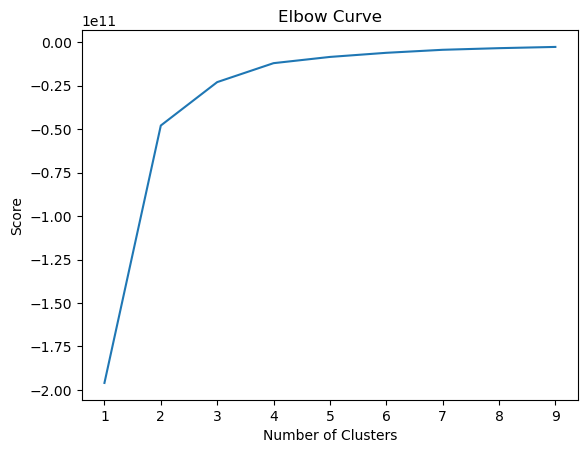

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on this graph, the optimal cluster count is 3, as that is where the elbow starts to straighten out.

# 3- k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\kenwh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\kenwh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
df.head()

,Age,Body Mass Index,Number of Children,Expenses,clusters
0,19,27.900,0,16884.92400,2
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,2
4,32,28.880,0,3866.85520,0


In [17]:
df['clusters'].value_counts()

clusters
0    887
2    288
1    162
Name: count, dtype: int64

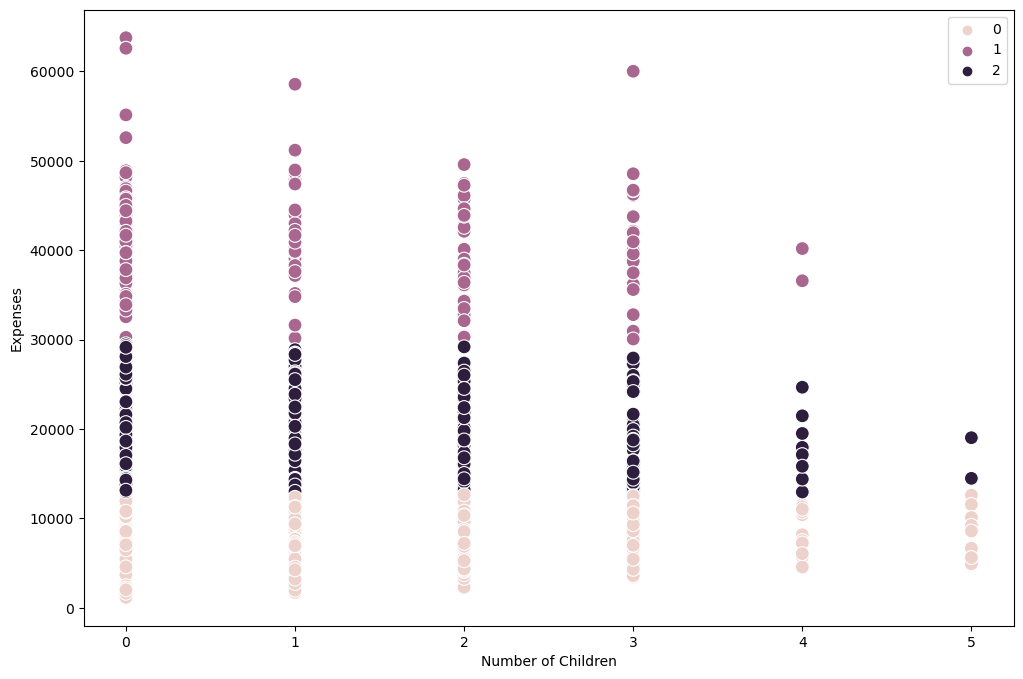

In [18]:
# Plot the clusters for the "Number of Children" and "Expenses" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Number of Children'], y=df['Expenses'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Children') 
plt.ylabel('Expenses') 
plt.show()

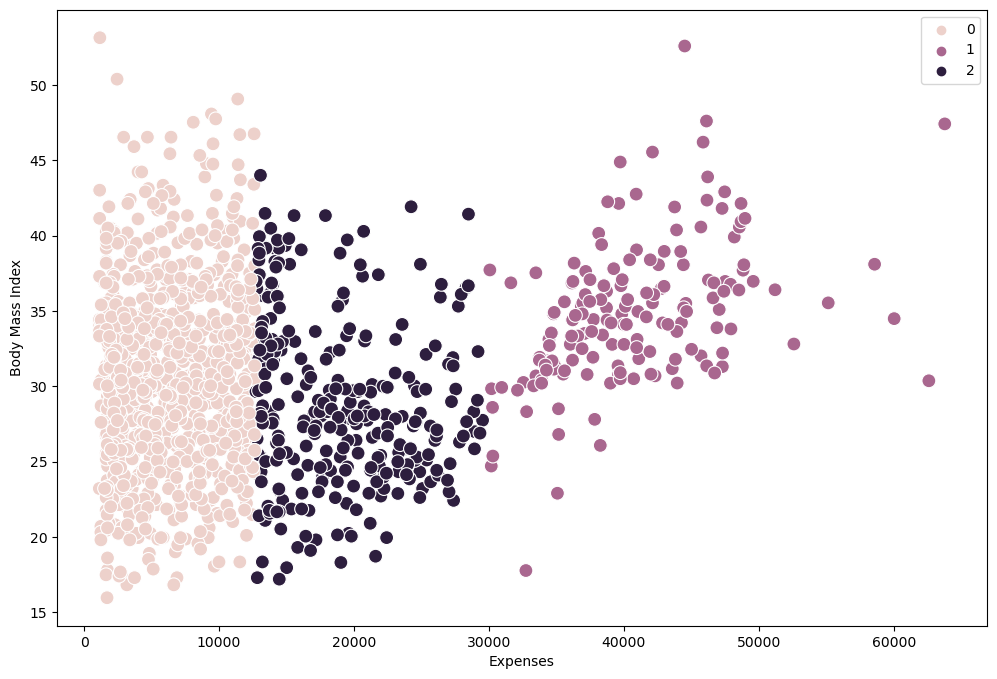

In [19]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Expenses'], y=df['Body Mass Index'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Expenses') 
plt.ylabel('Body Mass Index') 
plt.show()

From this cluster, we can see that there are very few people with low BMI (under 30) who also have high expenses. This shows that while there might not be a direct correlation, that low BMI is one predictor that can lead to low expenses.

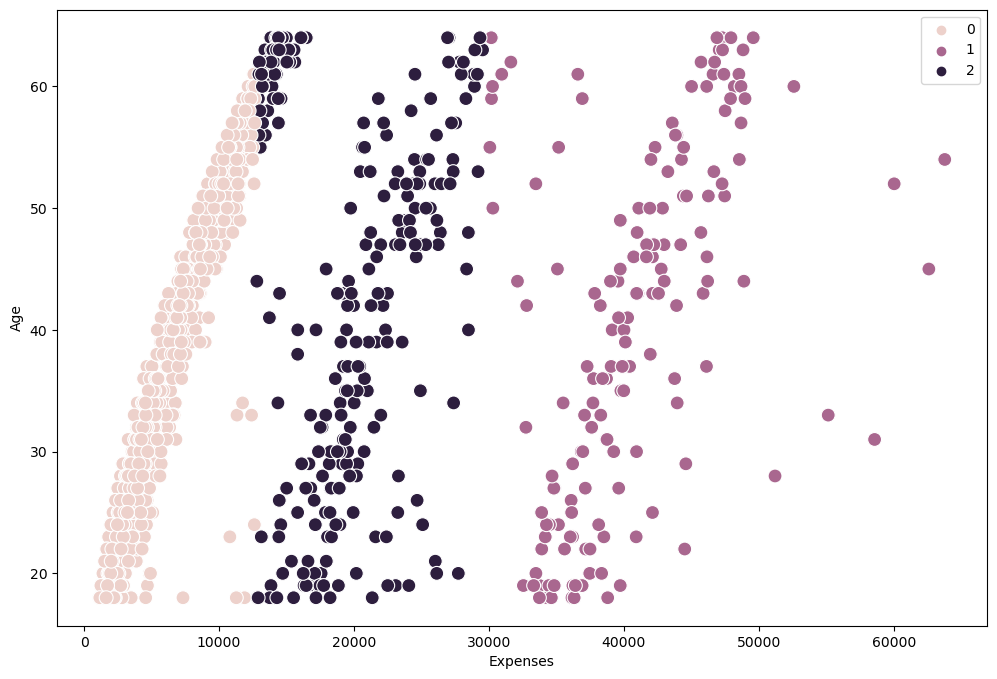

In [20]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Expenses'], y=df['Age'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Expenses') 
plt.ylabel('Age') 
plt.show()

From this cluster we can see that there is not much of a relationship between Age and Expenses, as each age cluster seems evenly spread out over the differnt expenses.

In [21]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [22]:
df.groupby('cluster').agg({'Age':['mean', 'median'], 
                         'Body Mass Index':['mean', 'median'], 
                         'Number of Children':['mean', 'median'],
                          'Expenses':['mean', 'median']})

Age        Body Mass Index         Number of Children  \
                  mean median            mean  median               mean   
cluster                                                                    
dark purple  44.975694   48.0       28.876354  28.000           1.069444   
pink         37.143179   37.0       30.479915  30.115           1.091319   
purple       40.376543   42.0       34.845432  34.650           1.166667   

                        Expenses               
            median          mean       median  
cluster                                        
dark purple    1.0  18897.644254  18319.49005  
pink           1.0   6435.548925   6238.29800  
purple         1.0  40761.308558  39854.11165

 We can see that in almost every catagory within each cluster, the mean is higher then the median, which means a positive, or right skewed, distribution of our data. 

In [23]:
df.head()

,Age,Body Mass Index,Number of Children,Expenses,clusters,cluster
0,19,27.900,0,16884.92400,2,dark purple
1,18,33.770,1,1725.55230,0,pink
2,28,33.000,3,4449.46200,0,pink
3,33,22.705,0,21984.47061,2,dark purple
4,32,28.880,0,3866.85520,0,pink


In [26]:
df.to_csv(os.path.join(path,'Data','Prepared data','cluster_data.cvc'))

In [29]:
cluster_data = 'cluster_data.xlsx'
df.to_excel(cluster_data, index=False)

In [30]:
print(f'Data has been successfully saved to {output_file}')

Data has been successfully saved to cluster_data.xlsx
